# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:Bank Gothic MD BT;font-size:140%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">NORTH AMERICAN SALARY TRENDS IN DATA RELATED CAREERS</p>

<p style="text-align:justify; ">
In today's rapidly evolving digital landscape, the importance of data-related jobs has become paramount. As businesses and organizations grapple with an ever-increasing volume of information, professionals adept at extracting insights from data play a pivotal role in shaping strategic decisions. Whether it's analyzing consumer behavior, optimizing operations, or predicting market trends, data-related roles such as data scientists, analysts, and engineers contribute significantly to driving innovation and fostering a competitive edge. These professionals not only transform raw data into actionable intelligence but also bridge the gap between raw information and informed decision-making. 

As we delve into this project, we will explore the dynamic realm of data-related jobs and their current salaries and popularity within the United States.
</p> 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#121212;margin:0;color:#ffffff;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
  
    
|No  | Contents                                     |No  | Contents                        |
|:---| :---                                         |:---| :----                           |
|1   | [<font color="#bc4749"> Data Collection & Cleaning</font>](#1)         |4  | [<font color="#bc4749"> Recent Trends</font>](#4)           | 
|2   | [<font color="#bc4749"> Data Analysis</font>](#2)         |5  | [<font color="#bc4749"> Summary of Findings</font>](#5)     |  
|3   | [<font color="#bc4749"> Statistical Analysis</font>](#3)  |6  | [<font color="#bc4749"> Thank You</font>](#6)               | 


<a id="1"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DATA COLLECTION AND CLEANING</p>

In [1]:
# Import required python packages
%matplotlib inline 
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# print('Matplotlib version: ', mpl.__version__)
# print(plt.style.available)
mpl.style.use(['tableau-colorblind10'])
sns.set_theme(style="ticks", palette="colorblind")

In [2]:
# Import jobs data
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df = pd.DataFrame(df, dtype=object)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   object
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   object
 5   salary_in_usd       9355 non-null   object
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: object(12)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
# Looking at all the unique data instances in the table
print("UNIQUE RECORDS IN DATA TABLE")
for i in df.columns:
    print('--'*38)
    print(i.upper())
    print(df[i].unique())

UNIQUE RECORDS IN DATA TABLE
----------------------------------------------------------------------------
WORK_YEAR
[2023 2022 2020 2021]
----------------------------------------------------------------------------
JOB_TITLE
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Busi

In [4]:
# Collecting the number of records obtained from each location and their weight on the overall data
df_loc_counts = pd.DataFrame(df[['company_location', 'employee_residence']].value_counts())
df_loc_counts['%_dataset_total'] = round((df_loc_counts['count']/df_loc_counts.values.sum())*100,2)
print(f"\033[1;4m{df_loc_counts['%_dataset_total'].values[0]}% of the data was obtained from US based companies and employees\033[0m")

# Exploring US relate data in the database
req = 'United States'
df_loc_counts.reset_index().query("company_location==@req or employee_residence==@req")

86.37% of the data was obtained from US based companies and employees


,company_location,employee_residence,count,%_dataset_total
0,United States,United States,8080,86.37
23,United States,India,5,0.05
32,United States,Canada,3,0.03
33,United States,Germany,3,0.03
37,United States,Argentina,3,0.03
38,United States,Spain,3,0.03
41,United States,Portugal,2,0.02
42,Canada,United States,2,0.02
43,United States,Philippines,2,0.02
46,United States,Russia,2,0.02


In [5]:
# filter company and employee locations to US only for this assessment
US_data = df[df['company_location'] == req]
US_data = US_data[US_data['employee_residence'] == req]

#remove 'company_size' and other repetitive columns
US_data.drop(columns={'company_size','salary_currency','salary_in_usd'
                      , 'employee_residence', 'company_location'}, inplace=True)
US_data.rename(columns={'work_year':'year'}, inplace=True)
US_data['salary'] = US_data['salary'].astype(int)
US_data.info()
US_data

<class 'pandas.core.frame.DataFrame'>
Index: 8080 entries, 1 to 9354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              8080 non-null   object
 1   job_title         8080 non-null   object
 2   job_category      8080 non-null   object
 3   salary            8080 non-null   int64 
 4   experience_level  8080 non-null   object
 5   employment_type   8080 non-null   object
 6   work_setting      8080 non-null   object
dtypes: int64(1), object(6)
memory usage: 505.0+ KB


,year,job_title,job_category,salary,experience_level,employment_type,work_setting
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person
5,2023,Data Scientist,Data Science and Research,130000,Senior,Full-time,Remote
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote


<a id="2"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS</p>

In [6]:
# Getting a count of the number of records in each column
US_data.nunique()

year                   4
job_title            101
job_category          10
salary              1360
experience_level       4
employment_type        3
work_setting           3
dtype: int64

In [7]:
# Collecting the number of records in each available year
US_rec_counts = pd.DataFrame(US_data['year'].value_counts())
US_rec_counts['%_dataset_total'] = round((US_rec_counts['count']/US_rec_counts.values.sum())*100,2)

#calculate the % of data obtaines in most recent years
k=round(US_rec_counts['%_dataset_total'].values[0] + US_rec_counts['%_dataset_total'].values[1], 2)
print(f"\033[1;4m{k}% of the data was obtained in the past 2 years\033[0m")

US_rec_counts

98.57% of the data was obtained in the past 2 years


,count,%_dataset_total
year,,
2023,6642,82.20
2022,1323,16.37
2021,87,1.08
2020,28,0.35


In [8]:
# Collecting count of job categories survey job category and year
jcat2 = US_data.groupby(['year'])['job_category'].value_counts().unstack().fillna(0)
jcat2

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI
year,,,,,,,,,,
2020,0.0,0.0,8.0,0.0,4.0,0.0,0.0,13.0,0.0,3.0
2021,0.0,0.0,16.0,4.0,22.0,1.0,0.0,27.0,5.0,12.0
2022,4.0,2.0,239.0,44.0,417.0,10.0,12.0,406.0,65.0,124.0
2023,284.0,3.0,975.0,189.0,1526.0,44.0,38.0,2179.0,369.0,1035.0


In [9]:
# Interactive full US data exploratory chart tool
exp_order='Entry-level', 'Mid-level', 'Senior', 'Executive'

# Define chart function
def update_chart(work_setting, selected_year, employment_type, experience_level):
    filtered_data = US_data[
        (US_data['work_setting'] == work_setting) 
        & (US_data['year'] == selected_year) 
        & (US_data['employment_type'] == employment_type) 
        & (US_data['experience_level'] == experience_level)
    ] 
    grouped_filtered_data = filtered_data.groupby(['job_category', 'job_title'])['salary'].median().reset_index()

    fig = px.bar(grouped_filtered_data, y='job_title', x='salary', color='job_category', orientation='h',
                 title=f"Median salary for {experience_level} {employment_type} employees in {selected_year} for {work_setting} data-jobs".upper(),
                 height=800, width=1000, template='simple_white')

    for i, (job_title, median_salary) in enumerate(zip(grouped_filtered_data['job_title'], grouped_filtered_data['salary'])):
        fig.add_annotation(
            go.layout.Annotation(x=median_salary,
                                 y=job_title, xref='x', yref='y'
                                 , text=f'{median_salary:,.0f}'
                                 , showarrow=True, arrowhead=1
                                 , ax=-70, ay=0,))
    fig.update_layout(
            legend=dict(traceorder="reversed",
            title_font_family="Ariel",
            font=dict(family="Courier",
                size=12, color="black"),
            bgcolor="crimson",bordercolor="gold",
            borderwidth=2,title="Job Category"))
    fig.update_layout(yaxis_title='JOB TITLE', xaxis_title='MEDIAN SALARY')
    fig.show()

# Dropdown for work_setting
work_setting_dropdown = widgets.Dropdown(
    options=US_data['work_setting'].unique()
    , value=US_data['work_setting'].unique()[0]
    , description='Work Setting:')

# Dropdown for year
year_dropdown = widgets.Dropdown(
    options=US_rec_counts.index
    , value=US_data['year'].unique()[0]
    , description='Year:')

# Dropdown for employment_type
employment_type_dropdown = widgets.Dropdown(
    options=US_data['employment_type'].unique()
    , value=US_data['employment_type'].unique()[0]
    , description='Employment Type:')

# Dropdown for experience_level
experience_level_dropdown = widgets.Dropdown(
    options=exp_order, value=exp_order[0]
    , description='Experience Level:')

# Add dropdowns to chart and print interactive chart
interactive_chart = interactive(update_chart, work_setting=work_setting_dropdown, selected_year=year_dropdown,
                                employment_type=employment_type_dropdown, experience_level=experience_level_dropdown)

display(interactive_chart)

interactive(children=(Dropdown(description='Work Setting:', options=('In-person', 'Remote', 'Hybrid'), value='…

<a id="3"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">STATISTICAL ANALYSIS</p>

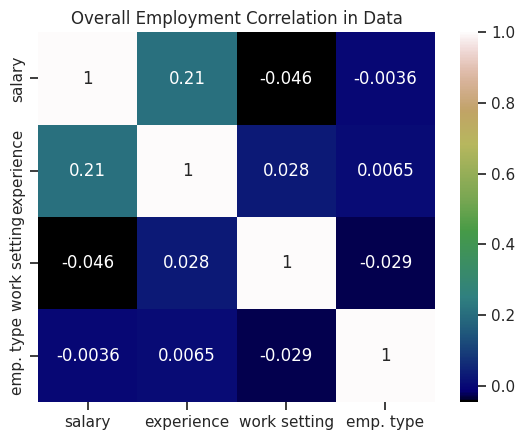

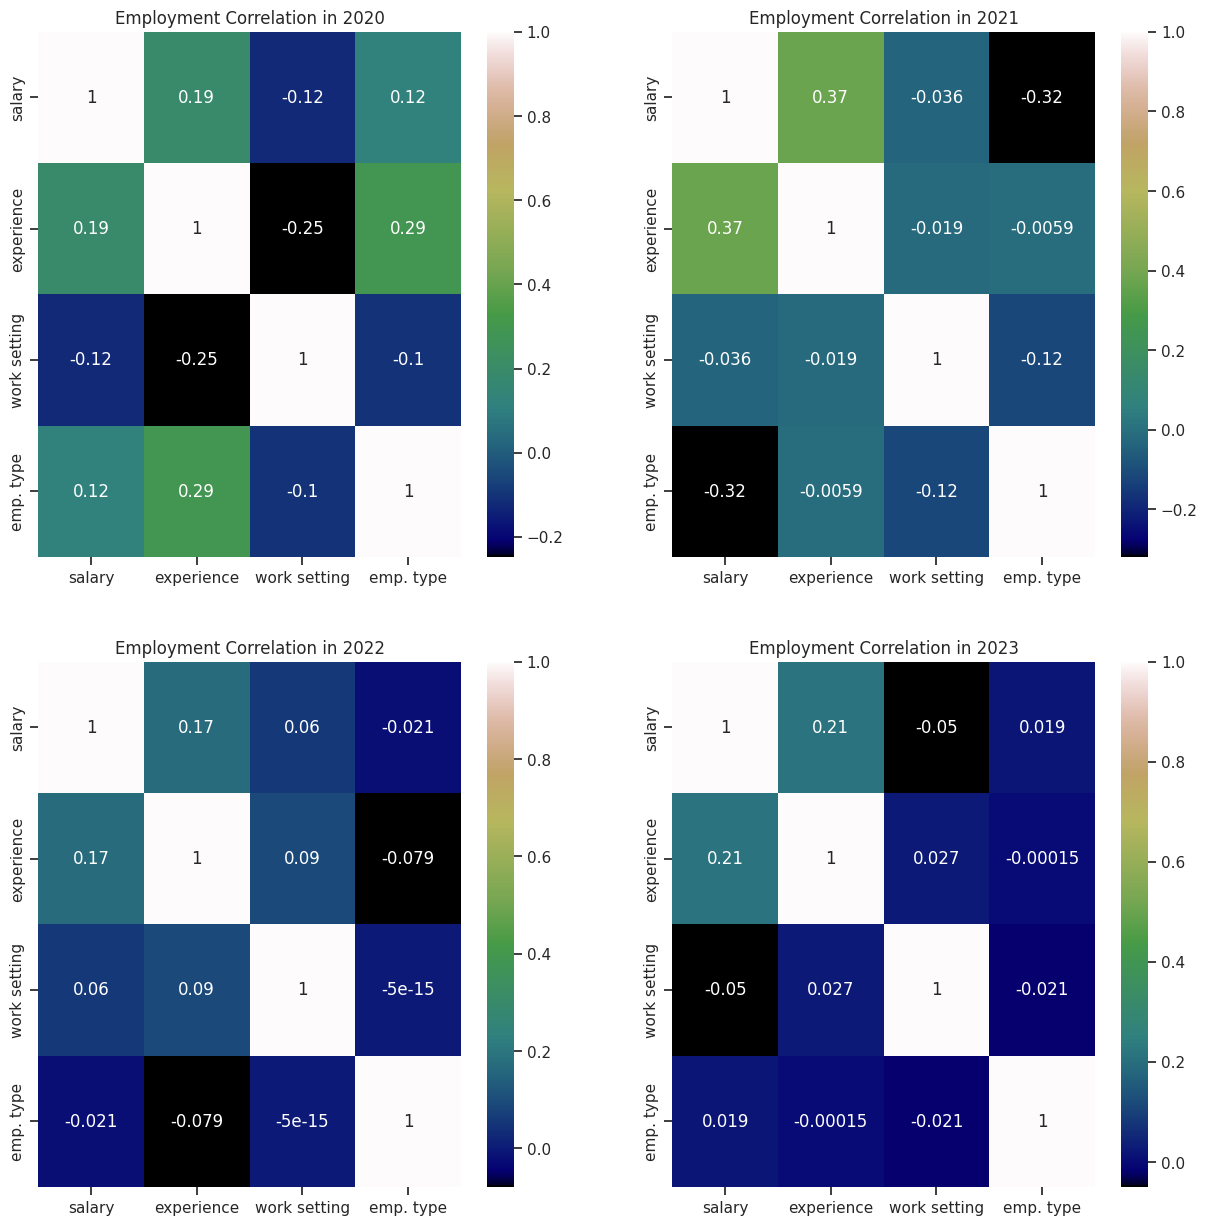

In [10]:
# Getting statistical averages for each year data
# overall average
label_encoder = LabelEncoder()
US_data["experience"] = label_encoder.fit_transform(US_data['experience_level'])
US_data["work setting"] = label_encoder.fit_transform(US_data['work_setting'])
US_data["emp. type"] = label_encoder.fit_transform(US_data['employment_type'])

corr_matrix = US_data[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Overall Employment Correlation in Data')
sns.heatmap(corr_matrix, annot = True, cmap ='gist_earth')
plt.show()

# Averages by year
plt.figure(figsize=(15,15))

plt.subplot(221)
year1 = US_data[US_data['year']==US_data['year'].min()]
corr_matrix = year1[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year1['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='gist_earth')

plt.subplot(222)
year2 = US_data[US_data['year']==US_data['year'].min()+1]
corr_matrix = year2[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year2['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='gist_earth')

plt.subplot(223)
year3 = US_data[US_data['year']==US_data['year'].min()+2]
corr_matrix = year3[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year3['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='gist_earth')

plt.subplot(224)
year4 = US_data[US_data['year']==US_data['year'].min()+3]
corr_matrix = year4[['salary', "experience", "work setting", "emp. type"]].corr()
plt.title('Employment Correlation in ' + str(int(year4['year'].unique())))
sns.heatmap(corr_matrix, annot = True, cmap ='gist_earth')

plt.show()

In [11]:
stats = US_data.describe(include='all')
stats

,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,8080.0,8080,8080,8080.000000,8080,8080,8080,8080.000000,8080.000000,8080.000000
unique,4.0,101,10,NaN,4,3,3,NaN,NaN,NaN
top,2023.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,In-person,NaN,NaN,NaN
freq,6642.0,1933,2625,NaN,6138,8067,5169,NaN,NaN,NaN
mean,NaN,NaN,NaN,158598.940223,NaN,NaN,NaN,2.648515,1.350866,0.999134
std,NaN,NaN,NaN,59228.911481,NaN,NaN,NaN,0.728853,0.487026,0.040104
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,117875.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,150000.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
75%,NaN,NaN,NaN,192000.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


In [12]:
y1_stats = year1.describe(include='all')
y1_stats

,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,28.0,28,28,28.000000,28,28,28,28.000000,28.000000,28.000000
unique,1.0,15,4,NaN,4,2,3,NaN,NaN,NaN
top,2020.0,Data Scientist,Data Science and Research,NaN,Mid-level,Full-time,Remote,NaN,NaN,NaN
freq,28.0,6,13,NaN,12,27,21,NaN,NaN,NaN
mean,NaN,NaN,NaN,160555.357143,NaN,NaN,NaN,1.678571,1.607143,0.964286
std,NaN,NaN,NaN,99650.709740,NaN,NaN,NaN,1.123934,0.737327,0.188982
min,NaN,NaN,NaN,70000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,99500.000000,NaN,NaN,NaN,0.750000,1.750000,1.000000
50%,NaN,NaN,NaN,119000.000000,NaN,NaN,NaN,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,188500.000000,NaN,NaN,NaN,2.250000,2.000000,1.000000


In [13]:
y2_stats = year2.describe(include='all')
y2_stats

,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,87.0,87,87,87.000000,87,87,87,87.000000,87.000000,87.000000
unique,1.0,28,7,NaN,4,2,3,NaN,NaN,NaN
top,2021.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,Remote,NaN,NaN,NaN
freq,87.0,19,27,NaN,34,84,60,NaN,NaN,NaN
mean,NaN,NaN,NaN,147206.034483,NaN,NaN,NaN,1.965517,1.551724,0.965517
std,NaN,NaN,NaN,69393.337087,NaN,NaN,NaN,1.104413,0.727510,0.183523
min,NaN,NaN,NaN,50000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,96575.000000,NaN,NaN,NaN,2.000000,1.000000,1.000000
50%,NaN,NaN,NaN,140000.000000,NaN,NaN,NaN,2.000000,2.000000,1.000000
75%,NaN,NaN,NaN,182500.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


In [14]:
y3_stats = year3.describe(include='all')
y3_stats

,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,1323.0,1323,1323,1323.000000,1323,1323,1323,1323.000000,1323.000000,1323.000000
unique,1.0,47,10,NaN,4,3,3,NaN,NaN,NaN
top,2022.0,Data Engineer,Data Engineering,NaN,Senior,Full-time,Remote,NaN,NaN,NaN
freq,1323.0,409,417,NaN,1027,1321,711,NaN,NaN,NaN
mean,NaN,NaN,NaN,148294.352230,NaN,NaN,NaN,2.660620,1.526833,1.000000
std,NaN,NaN,NaN,50922.812594,NaN,NaN,NaN,0.738307,0.520239,0.038895
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,114450.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,142127.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000
75%,NaN,NaN,NaN,180000.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


In [15]:
y4_stats = year4.describe(include='all')
y4_stats

,year,job_title,job_category,salary,experience_level,employment_type,work_setting,experience,work setting,emp. type
count,6642.0,6642,6642,6642.000000,6642,6642,6642,6642.000000,6642.000000,6642.000000
unique,1.0,79,10,NaN,4,3,3,NaN,NaN,NaN
top,2023.0,Data Engineer,Data Science and Research,NaN,Senior,Full-time,In-person,NaN,NaN,NaN
freq,6642.0,1502,2179,NaN,5070,6635,4553,NaN,NaN,NaN
mean,NaN,NaN,NaN,160792.462210,NaN,NaN,NaN,2.659139,1.312105,0.999548
std,NaN,NaN,NaN,60175.222882,NaN,NaN,NaN,0.711754,0.465980,0.032463
min,NaN,NaN,NaN,24000.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,120000.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
50%,NaN,NaN,NaN,151600.000000,NaN,NaN,NaN,3.000000,1.000000,1.000000
75%,NaN,NaN,NaN,198200.000000,NaN,NaN,NaN,3.000000,2.000000,1.000000


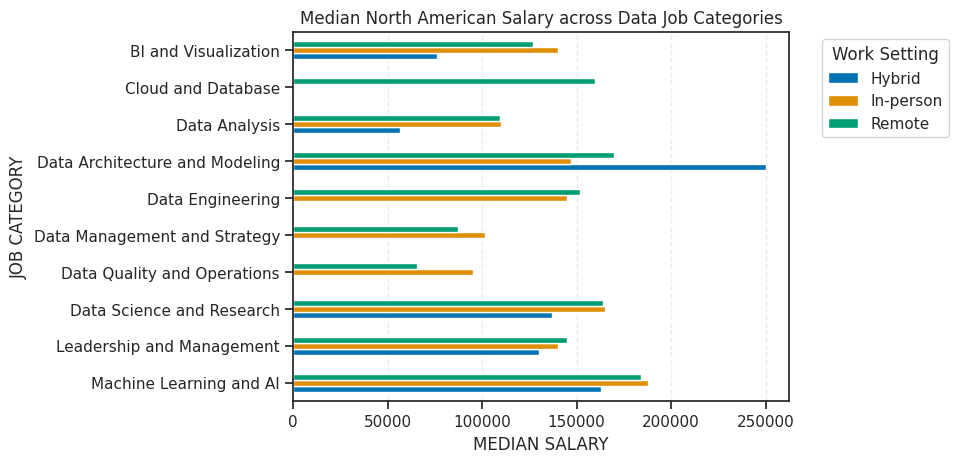

In [16]:
# Fetching the median salary by job category and work setting
jcat = US_data.groupby(['job_category', 'work_setting'])['salary'].median().unstack().fillna(
    0).sort_index(ascending=False)

jcat.plot.barh(title='Median North American Salary across Data Job Categories', legend=True)
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlabel('MEDIAN SALARY')
plt.ylabel('JOB CATEGORY')

plt.show()

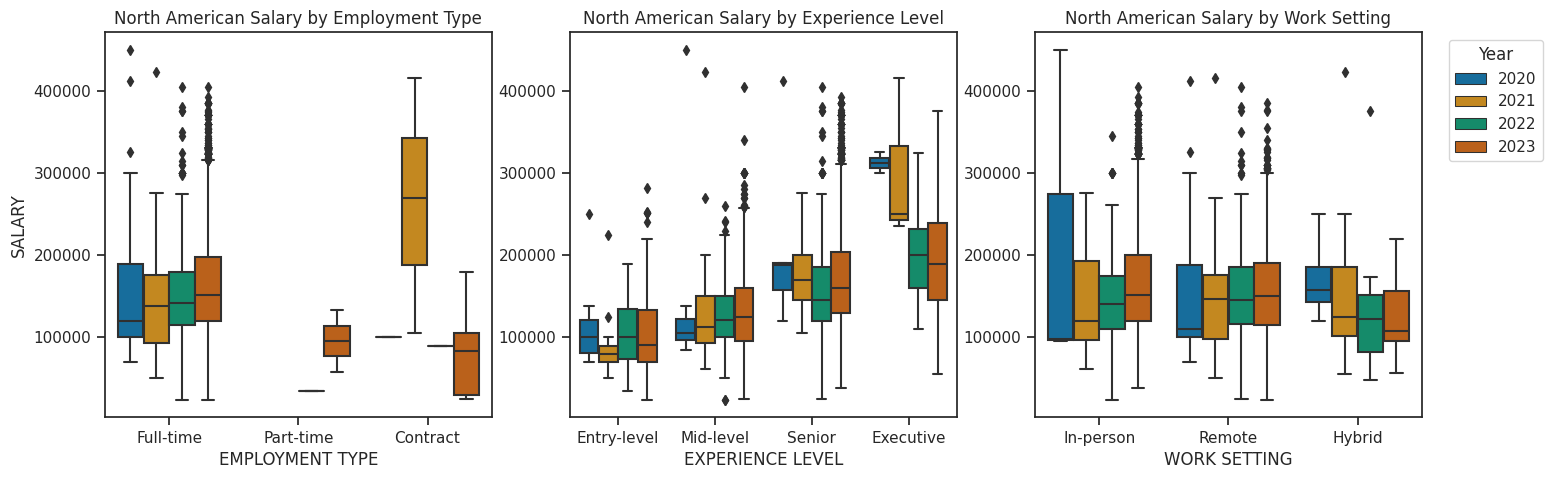

In [17]:
# Fetching salary data by most statistically significant categories
plt.figure(figsize=(17,5))

plt.subplot(131)
sns.boxplot(data=US_data, x='employment_type', y='salary',hue='year')
plt.xlabel('EMPLOYMENT TYPE')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title('North American Salary by Employment Type')

plt.subplot(132)
sns.boxplot(data=US_data, x='experience_level', y='salary', hue='year'
            , order=exp_order)
plt.legend().remove()
plt.ylabel("")
plt.xlabel('EXPERIENCE LEVEL')
plt.title('North American Salary by Experience Level')

plt.subplot(133)
sns.boxplot(data=US_data, x='work_setting', y='salary', hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("")
plt.xlabel('WORK SETTING')
plt.title('North American Salary by Work Setting')

plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Most Recent Salary Details</p>

> Since Experience level is the most significant factor in determining salary, and majority of the respondents are full-time employees, let's assess the salary breakdown for full-time employees by experience for the most recent 2 years.

NB. Approximately 99% of the data was obtained in the past 2 years. Limiting trend analysis to this time period will yield more meaningful results.

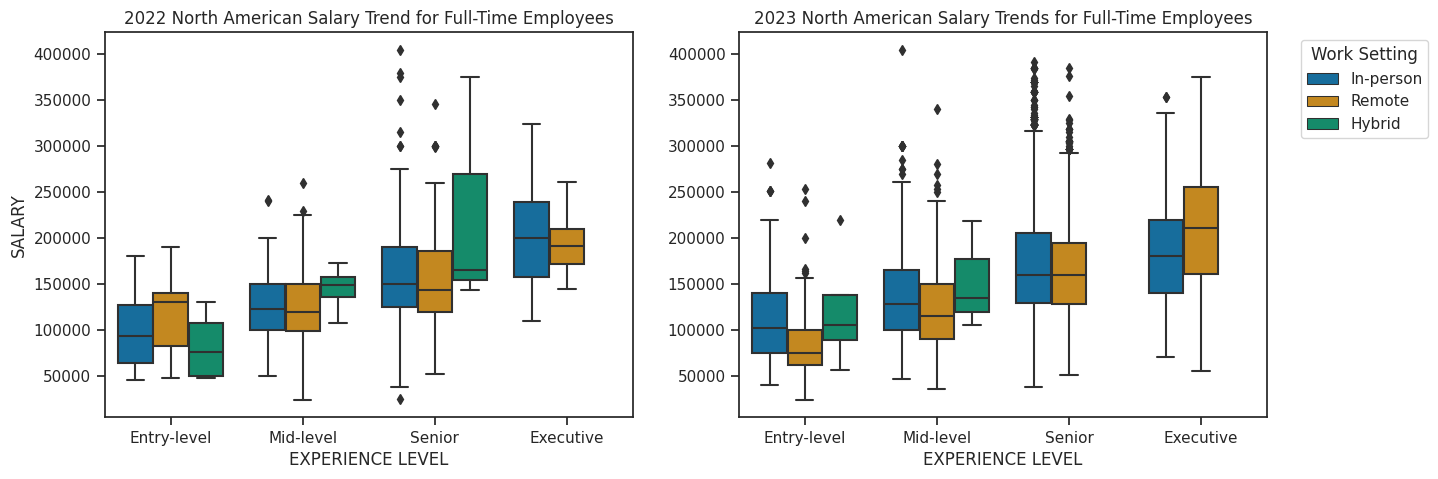

In [18]:
# tabulating the data for the most recent years
this_year = US_data['year'].max()
last_year = US_data['year'].max()-1
emp_type = 'Full-time'

plt.figure(figsize=(15,5))
plt.subplot(121)

# Getting the penultimate year data
lyear = US_data.query('year == @last_year and employment_type == @emp_type')
sns.boxplot(data=lyear, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.ylabel('SALARY')
plt.legend().remove()
plt.title(str(last_year) + ' North American Salary Trend for Full-Time Employees')

plt.subplot(122)
# Getting the most recent year data
present = US_data.query('year == @this_year and employment_type == @emp_type')
sns.boxplot(data=present, x='experience_level', y='salary',hue='work_setting', order=exp_order)
plt.xlabel('EXPERIENCE LEVEL')
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(str(this_year) + ' North American Salary Trends for Full-Time Employees')
plt.ylabel('')

plt.show()

In [19]:
# getting the past 2 years of data to make % comparisons
present_data = present.groupby(['employment_type', 'experience_level', 'work_setting'])['salary'].median()
lyear_data = lyear.groupby(['employment_type','experience_level', 'work_setting'])['salary'].median()

recent_data = pd.merge(lyear_data, present_data, on=['employment_type', 'experience_level', 'work_setting']
                       , suffixes=('_lastyear', '_present'))

# Calculate percentage change for the past 2 years
recent_data['%_change'] = ((recent_data['salary_present'] - recent_data['salary_lastyear']) 
                           / recent_data['salary_lastyear']) * 100
recent_data

salary_lastyear  \
employment_type experience_level work_setting                    
Full-time       Entry-level      Hybrid                76000.0   
                                 In-person            130000.0   
                                 Remote                93000.0   
                Executive        In-person            191080.0   
                                 Remote               200000.0   
                Mid-level        Hybrid               149000.0   
                                 In-person            120000.0   
                                 Remote               122500.0   
                Senior           In-person            144000.0   
                                 Remote               150000.0   

                                               salary_present   %_change  
employment_type experience_level work_setting                             
Full-time       Entry-level      Hybrid              105000.0  38.157895  
                                 In-person           102000.0 -21.538462  
                                 Remote               75000.0 -19.354839  
                Executive        In-person           180000.0  -5.798618  
                                 Remote              210914.0   5.457000  
                Mid-level        Hybrid              135000.0  -9.395973  
                                 In-person           128000.0   6.666667  
                                 Remote              115000.0  -6.122449  
                Senior           In-person           160000.0  11.111111  
                                 Remote              160000.0   6.666667

<a id="5"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">SUMMARY OF FINDINGS</p>

	 This assessment is an in-depth analysis of the salary details for North American employers whose employees are also located in North America. The dataset contains 4 years of salary details for Data-related careers from 2020 to 2023 and comprises 8,080 records, with 28 collected in 2020, 87 in 2021, 1,323 in 2022, and 6,642 in 2023. The Data job categories reported include:
 ['Data Architecture and Modeling' 'Data Science and Research'
 'Machine Learning and AI' 'Data Engineering' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Management and Strategy' 'Data Quality and Operations'
 'Cloud and Database']. 
Participants reported experience levels as follows: ['Senior' 'Mid-level' 'Executive' 'Entry-level'] 

	The maximum reported salary across all categories over the 4 years is $nan for a Mid-level Research Scientist. Conversely, the minimum reported salary stands at $6,642.00 for a Entry-level Data Scientist. The median salary is $150,000.00 within which 2.4

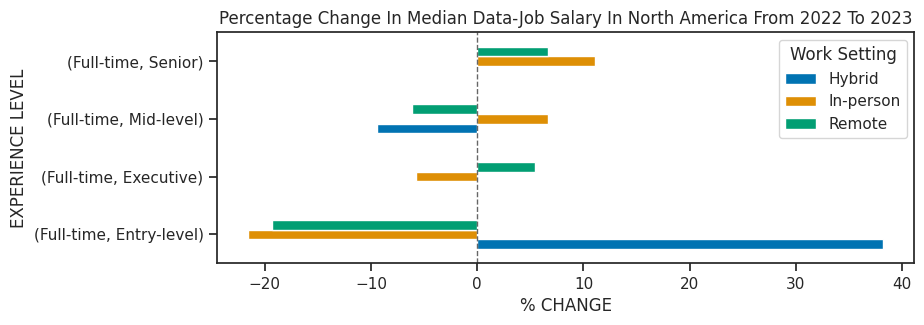

In [20]:
# Defining new variables for summary of findings
years = sorted(US_data['year'].unique())
x = int(US_data['year'].value_counts().describe()[0])
y = US_data['job_category'].unique()
exp = US_data['experience_level'].unique()
UScount = int(stats.iloc[0,0])
m = "{:,.2f}".format(US_data['salary'].median())
medianpaypercentage = "{:,.2f}".format((US_data[US_data['salary']==US_data['salary'].median()].count()[0] / UScount)* 100)
maxpay = US_data[US_data['salary']==stats.iloc[-1,3]]
minpay = US_data[US_data['salary']==stats.iloc[6,3]]

# Assessment findings
print(
f'\t This assessment is an in-depth analysis of the salary details for \
North American employers whose employees are also located in North America. \
The dataset contains {x} years of salary details for Data-related \
careers from {years[0]} to {years[3]} and comprises {"{:,}".format(UScount)} records, with \
{"{:,}".format(int(y1_stats.iloc[0,0]))} collected in {years[0]}, \
{"{:,}".format(int(y2_stats.iloc[0,0]))} in {years[1]}, \
{"{:,}".format(int(y3_stats.iloc[0,0]))} in {years[2]}, \
and {"{:,}".format(int(y4_stats.iloc[0,0]))} in {years[3]}. \
The Data job categories reported include:\n {y}. \n\
Participants reported experience levels as follows: {exp} \n\n\t\
The maximum reported salary across all categories over the {x} years is \
${"{:,.2f}".format(stats.iloc[-1,0])} for a {maxpay.iloc[0,4]} {maxpay.iloc[0,1]}. \
Conversely, the minimum reported salary stands at ${"{:,.2f}".format(stats.iloc[3,0])} \
for a {minpay.iloc[0,4]} {minpay.iloc[0,1]}. The median salary is ${m} within which \
{medianpaypercentage}% of the total reported jobs fall.\n\n\t\
Salary directly correlates with experience level and has an inverse correlation with work location. \
On average, employees with more experience report higher salaries whereas the location of work \
does not have a significant effect on salary. Full-time, in-person employees are the highest paid \
among all surveyed, closely followed by full-time remote employees. Notably, \
"Machine learning and AI" claim the title of the highest-paying job category for both \
In-Person and Remote data professionals; while "data architecture and modeling" proves to be \
most lucrative for hybrid employees. \n\n\t\
Approximately 99% of the data has been obtained most recently. As a result, the most \
significant findings can be gained from this period. The median salary reported across \
experience levels for full-time emploees has remained mostly neutral \
for the most recent 2 year period across work settings and experience levels. \
The sharpest spikes, both positively and negatively, have been observed in Entry-Level \
positions and an overall positive median salary increase has been observed for Senior positions. \n\
See the most recent median salary comparison graph below:\
    ')

recent_data['%_change'].unstack().plot.barh(title=
    f'Percentage change in median data-job salary in North America from {str(last_year)} to {str(this_year)}'.title()
    , figsize=(9,3)).axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.6)
plt.xlabel('% CHANGE')
plt.ylabel('EXPERIENCE LEVEL')
plt.legend(title='Work Setting')
plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#bc4749;margin:0;color:#e9c46a;font-family:Segoe Print;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>


<p>
<h3><font color="#bc4749">If you like this notebook please upvote. Your feedback is greatly appreciated.</font></h3>

<br>

<h4><b>Author :</b></h4>

<h3>Sonya Lawrence-Thompson</h3>

<b>👉Lets's chat :</b> [Twitter](https://twitter.com/Sonya_Lawrence1)<br>
<b>👉Connect with me :</b> [LinkedIn](https://www.linkedin.com/in/sonya-lt/)<br>
<b>👉Explore my Projects :</b> [Github](https://github.com/sonya-7)
    
</p> 